# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4  scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$, etc.

In [51]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

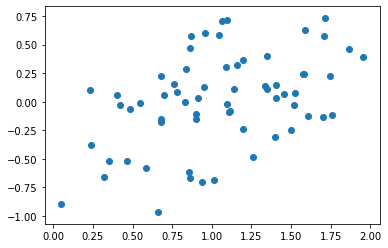

In [52]:
n = 64
x = np.linspace(0,1,n) + np.random.rand(4,n)
x = np.vstack([x,np.ones(len(x.T))]).T
y = np.linspace(0,1,n) + np.random.rand(n) - 1
plt.scatter(x.T[0],y)

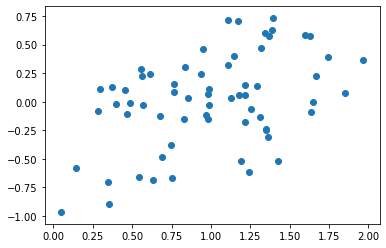

In [53]:
plt.scatter(x.T[1],y)

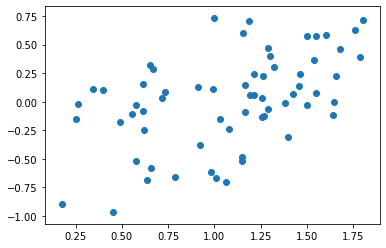

In [54]:
plt.scatter(x.T[2],y)

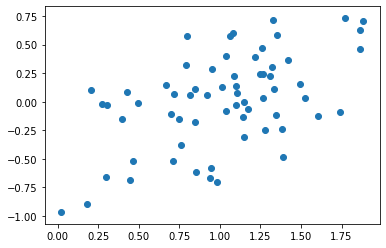

In [55]:
plt.scatter(x.T[3],y)

## 2.  Create a Linear Regression model to fit the data. Use the example from Lesson 3 and do not use a library that calculates automatically. We are expecting 5 coefficients to describe the linear model.

In [56]:
left = np.linalg.inv(np.dot(x.T,x))
left

array([[ 0.13824508, -0.00329664, -0.03542884, -0.0689365 , -0.03372466],
       [-0.00329664,  0.1283495 , -0.06683472, -0.02143343, -0.0303414 ],
       [-0.03542884, -0.06683472,  0.17496028, -0.04485475, -0.03907785],
       [-0.0689365 , -0.02143343, -0.04485475,  0.16520749, -0.02612981],
       [-0.03372466, -0.0303414 , -0.03907785, -0.02612981,  0.14997498]])

In [57]:
right = np.dot(y.T,x)
right

array([5.75844713, 5.69963411, 6.07332383, 6.50791429, 0.59858987])

In [58]:
beta = np.dot(left,right)
beta

array([ 0.0932964 ,  0.14900377,  0.1623394 ,  0.2679678 , -0.68474606])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

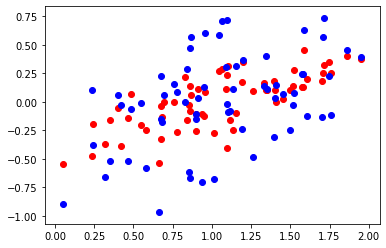

In [59]:
pred = np.dot(x,beta)
plt.scatter(x.T[0], pred, color='red')
plt.scatter(x.T[0], y, color='blue')

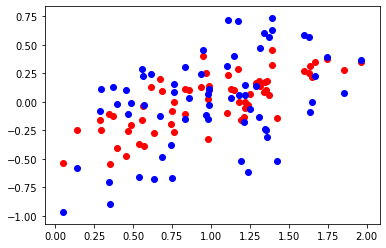

In [60]:
plt.scatter(x.T[1], pred, color='red')
plt.scatter(x.T[1], y, color='blue')

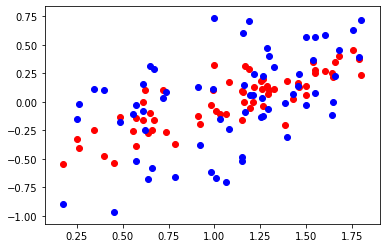

In [61]:
plt.scatter(x.T[2], pred, color='red')
plt.scatter(x.T[2], y, color='blue')

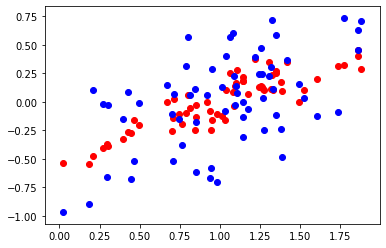

In [62]:
plt.scatter(x.T[3], pred, color='red')
plt.scatter(x.T[3], y, color='blue')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [13]:
import pandas as pd
import numpy as np
credit = pd.read_csv('C:/Users/bmpst/Desktop/JHU/Machine_Learning_and_Neural_Networks/mlnn_jess/data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [30]:
columns = ['Income', 'Limit','Cards','Age','Education','Balance']
X = credit[columns].values
X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 2.00000e+00, ..., 1.10000e+01,
        3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 3.00000e+00, ..., 1.50000e+01,
        9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 4.00000e+00, ..., 1.10000e+01,
        5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 5.00000e+00, ..., 1.20000e+01,
        1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00, ..., 1.30000e+01,
        0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 5.00000e+00, ..., 7.00000e+00,
        9.66000e+02, 1.00000e+00]])

In [31]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [32]:
left = np.linalg.inv(np.dot(X.T,X))
left

array([[ 1.09376521e-05, -2.54933257e-07, -1.10468570e-05,
        -4.73901705e-07, -4.05967208e-07,  7.16971366e-07,
         4.04349897e-04],
       [-2.54933257e-07,  7.88214099e-09,  4.86763583e-07,
        -1.55354592e-08,  3.88566835e-08, -2.51602423e-08,
        -1.38125714e-05],
       [-1.10468570e-05,  4.86763583e-07,  1.38709121e-03,
        -7.27049745e-06,  3.37993939e-05, -2.06848360e-06,
        -4.88214225e-03],
       [-4.73901705e-07, -1.55354592e-08, -7.27049745e-06,
         8.82342281e-06, -6.56282476e-07,  8.52833845e-08,
        -4.10198006e-04],
       [-4.05967208e-07,  3.88566835e-08,  3.37993939e-05,
        -6.56282476e-07,  2.57751610e-04, -1.48215142e-07,
        -3.61876549e-03],
       [ 7.16971366e-07, -2.51602423e-08, -2.06848360e-06,
         8.52833845e-08, -1.48215142e-07,  9.57388638e-08,
         4.03060734e-05],
       [ 4.04349897e-04, -1.38125714e-05, -4.88214225e-03,
        -4.10198006e-04, -3.61876549e-03,  4.03060734e-05,
         1.1461282

In [33]:
right = np.dot(y.T,X)
right

array([8.1418781e+06, 8.1439342e+08, 4.2440100e+05, 8.0133110e+06,
       1.9037630e+06, 9.8342081e+07, 1.4197600e+05])

In [34]:
Beta = np.dot(left,right)
Beta

array([ 9.48157743e-02,  6.42304413e-02,  4.67706085e+00,  8.06617460e-03,
       -2.30863025e-01,  8.18115721e-03,  3.10522106e+01])

### 5. Plot your results. Show as many of your columns vs. credit rating that you can. 

Text(0, 0.5, 'Credit Score')

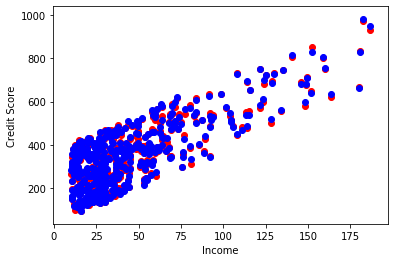

In [47]:
Pred = np.dot(X,Beta)
plt.scatter(X.T[0], Pred, color='red')
plt.scatter(X.T[0], y, color='blue')
plt.xlabel('Income')
plt.ylabel('Credit Score')

Text(0, 0.5, 'Credit Score')

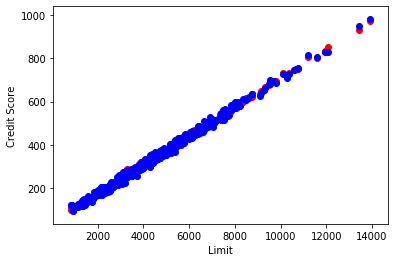

In [46]:
plt.scatter(X.T[1], Pred, color='red')
plt.scatter(X.T[1], y, color='blue')
plt.xlabel('Limit')
plt.ylabel('Credit Score')

Text(0, 0.5, 'Credit Score')

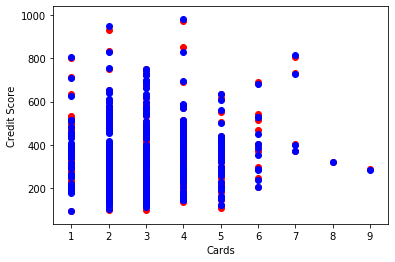

In [45]:
plt.scatter(X.T[2], Pred, color='red')
plt.scatter(X.T[2], y, color='blue')
plt.xlabel('Cards')
plt.ylabel('Credit Score')

Text(0, 0.5, 'Credit Score')

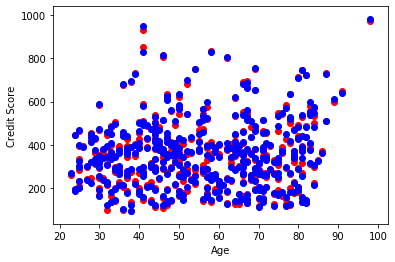

In [44]:
plt.scatter(X.T[3], Pred, color='red')
plt.scatter(X.T[3], y, color='blue')
plt.xlabel('Age')
plt.ylabel('Credit Score')

Text(0, 0.5, 'Credit Score')

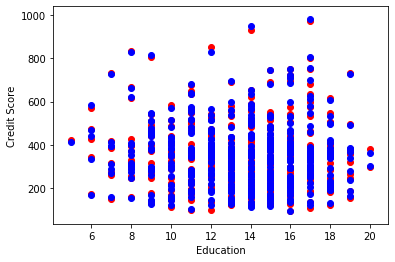

In [43]:
plt.scatter(X.T[4], Pred, color='red')
plt.scatter(X.T[4], y, color='blue')
plt.xlabel('Education')
plt.ylabel('Credit Score')

Text(0, 0.5, 'Credit Score')

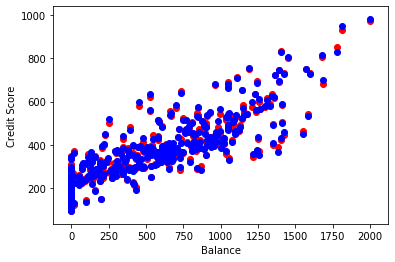

In [42]:
plt.scatter(X.T[5], Pred, color='red')
plt.scatter(X.T[5], y, color='blue')
plt.xlabel('Balance')
plt.ylabel('Credit Score')